# EDA

Este notebook tiene como objetivo realizar un análisis exploratorio del conjunto de datos
relacionado con churn de clientes, con el fin de comprender su estructura, calidad,
distribución de las variables y posibles relaciones entre ellas.



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
df = pd.read_csv("../data/processed/churn_base.csv")

In [16]:
df.head()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [17]:
df.shape

(10763, 23)

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tipo_credito,10763.0,NaN,NaN,NaN,5.411131,2.338279,4.0,4.0,4.0,9.0,68.0
fecha_prestamo,10763,10758,2025-04-10 18:14:34,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_prestado,10763.0,NaN,NaN,NaN,2434315.001319,1909642.758997,360000.0,1224831.0,1921920.0,3084840.0,41444152.8
plazo_meses,10763.0,NaN,NaN,NaN,10.575583,6.632082,2.0,6.0,10.0,12.0,90.0
edad_cliente,10763.0,NaN,NaN,NaN,43.94862,15.060877,19.0,33.0,42.0,53.0,123.0
tipo_laboral,10763,2,Empleado,6754,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salario_cliente,10763.0,NaN,NaN,NaN,17216431.459909,355476717.603482,0.0,2000000.0,3000000.0,4875808.0,22000000000.0
total_otros_prestamos,10763.0,NaN,NaN,NaN,6238869.648518,118418316.941069,0.0,500000.0,1000000.0,2000000.0,6787675263.0
cuota_pactada,10763.0,NaN,NaN,NaN,243617.406671,210493.694608,23944.0,121041.5,182863.0,287833.5,3816752.0
puntaje,10763.0,NaN,NaN,NaN,91.170036,16.465441,-38.00999,95.227787,95.227787,95.227787,95.227787


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tipo_credito                   10763 non-null  int64  
 1   fecha_prestamo                 10763 non-null  object 
 2   capital_prestado               10763 non-null  float64
 3   plazo_meses                    10763 non-null  int64  
 4   edad_cliente                   10763 non-null  int64  
 5   tipo_laboral                   10763 non-null  object 
 6   salario_cliente                10763 non-null  int64  
 7   total_otros_prestamos          10763 non-null  int64  
 8   cuota_pactada                  10763 non-null  int64  
 9   puntaje                        10763 non-null  float64
 10  puntaje_datacredito            10757 non-null  float64
 11  cant_creditosvigentes          10763 non-null  int64  
 12  huella_consulta                10763 non-null 

In [20]:
df.describe().round(4)

,tipo_credito,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763.0000,1.076300e+04,10763.0000,10763.0000,1.076300e+04,1.076300e+04,1.076300e+04,10763.0000,10757.0000,10763.0000,10763.0000,10607.0000,1.060700e+04,1.035800e+04,10173.0000,10763.0000,10763.0000,10763.0000,7.833000e+03,10763.0000
mean,5.4111,2.434315e+06,10.5756,43.9486,1.721643e+07,6.238870e+06,2.436174e+05,91.1700,780.7908,5.7267,4.2286,7.7460,4.593741e+04,4.034617e+04,0.2600,2.7800,0.2698,1.3027,2.005157e+06,0.9525
std,2.3383,1.909643e+06,6.6321,15.0609,3.554767e+08,1.184183e+08,2.104937e+05,16.4654,104.8780,3.9772,3.0647,225.9551,1.062698e+05,7.124244e+04,21.7729,2.7488,0.7165,1.8244,2.144116e+06,0.2127
min,4.0000,3.600000e+05,2.0000,19.0000,0.000000e+00,0.000000e+00,2.394400e+04,-38.0100,-7.0000,0.0000,0.0000,0.0000,0.000000e+00,0.000000e+00,0.0000,0.0000,0.0000,0.0000,0.000000e+00,0.0000
25%,4.0000,1.224831e+06,6.0000,33.0000,2.000000e+06,5.000000e+05,1.210415e+05,95.2278,757.0000,3.0000,2.0000,0.0000,2.898000e+03,2.690000e+03,0.0000,1.0000,0.0000,0.0000,9.251570e+05,1.0000
50%,4.0000,1.921920e+06,10.0000,42.0000,3.000000e+06,1.000000e+06,1.828630e+05,95.2278,791.0000,5.0000,4.0000,0.0000,1.617800e+04,1.444250e+04,0.0000,2.0000,0.0000,1.0000,1.204496e+06,1.0000
75%,9.0000,3.084840e+06,12.0000,53.0000,4.875808e+06,2.000000e+06,2.878335e+05,95.2278,825.0000,8.0000,6.0000,0.0000,5.298200e+04,4.763225e+04,0.0000,4.0000,0.0000,2.0000,2.231859e+06,1.0000
max,68.0000,4.144415e+07,90.0000,123.0000,2.200000e+10,6.787675e+09,3.816752e+06,95.2278,999.0000,62.0000,29.0000,12534.0000,5.116066e+06,1.562285e+06,2145.0000,51.0000,13.0000,25.0000,3.810658e+07,1.0000


### Valores faltantes

Se identificó la presencia de valores faltantes en el conjunto de datos. En particular,
algunas variables presentan un porcentaje significativo de datos ausentes, lo cual será
tenido en cuenta en etapas posteriores del proyecto para definir estrategias de tratamiento.


In [30]:
round(df.isnull().mean() * 100,4).sort_values(ascending=False)

tendencia_ingresos               27.2415
promedio_ingresos_datacredito    27.2229
saldo_mora_codeudor               5.4817
saldo_principal                   3.7629
saldo_mora                        1.4494
saldo_total                       1.4494
puntaje_datacredito               0.0557
salario_cliente                   0.0000
tipo_laboral                      0.0000
edad_cliente                      0.0000
plazo_meses                       0.0000
capital_prestado                  0.0000
fecha_prestamo                    0.0000
tipo_credito                      0.0000
total_otros_prestamos             0.0000
cant_creditosvigentes             0.0000
huella_consulta                   0.0000
cuota_pactada                     0.0000
puntaje                           0.0000
creditos_sectorCooperativo        0.0000
creditos_sectorFinanciero         0.0000
creditos_sectorReal               0.0000
Pago_atiempo                      0.0000
dtype: float64

### Variable objetivo

La variable objetivo del proyecto es `Pago_atiempo`, la cual corresponde a una variable

binaria donde:
- 1 indica que el cliente realizó el pago de manera oportuna.
- 0 indica que el cliente incurrió en mora o incumplimiento.

De igual forma, de evidencia que la variable objetivo presenta una distribución desbalanceada, lo cual es relevante para
etapas posteriores de modelado, ya que puede influir en la selección de métricas y técnicas
de evaluación.

In [22]:
df["Pago_atiempo"].value_counts(normalize=True) * 100

Pago_atiempo
1    95.252253
0     4.747747
Name: proportion, dtype: float64

### Distribución de clientes según pago a tiempo

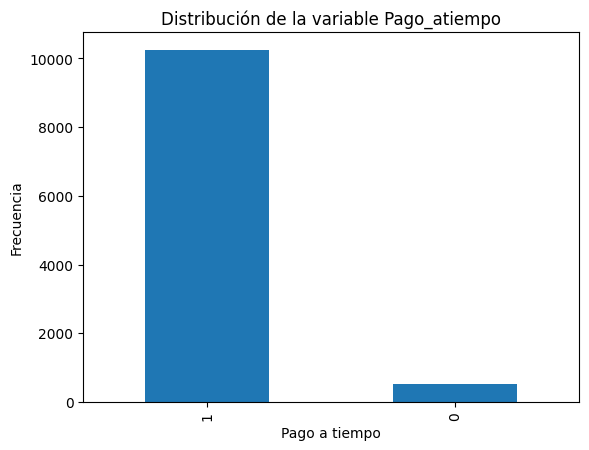

In [23]:
df["Pago_atiempo"].value_counts().plot(kind="bar")
plt.title("Distribución de la variable Pago_atiempo")
plt.xlabel("Pago a tiempo")
plt.ylabel("Frecuencia")
plt.show()

### Distribución de los salarios de los clientes

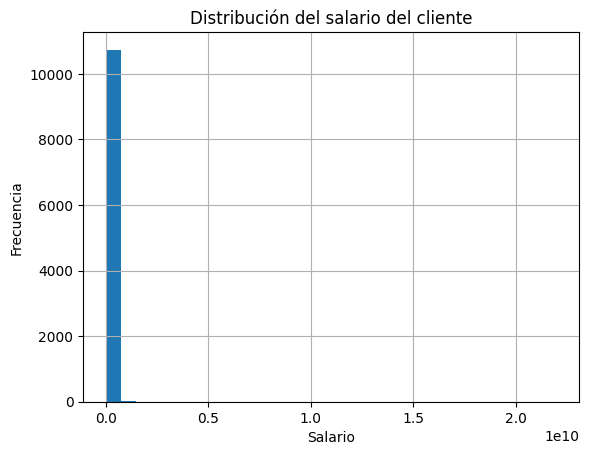

In [24]:
plt.figure()
df["salario_cliente"].hist(bins=30)
plt.title("Distribución del salario del cliente")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()


### Distribución de la edad de los clientes

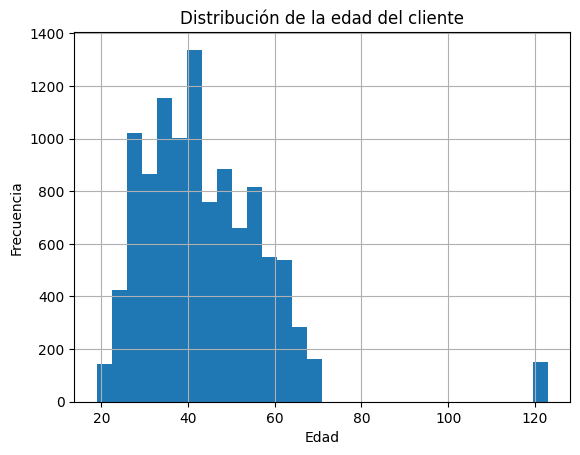

In [25]:
plt.figure()
df["edad_cliente"].hist(bins=30)
plt.title("Distribución de la edad del cliente")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


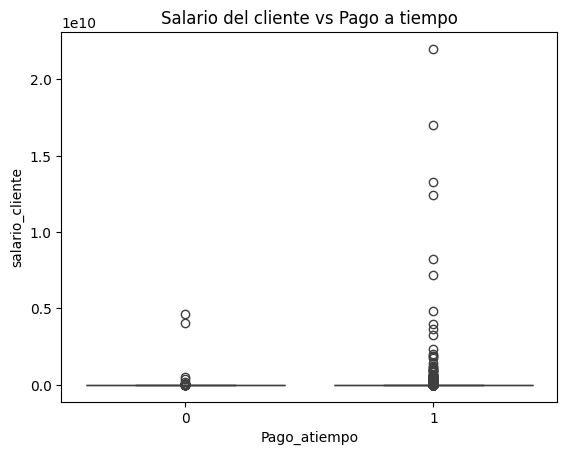

In [26]:
plt.figure()
sns.boxplot(x="Pago_atiempo", y="salario_cliente", data=df)
plt.title("Salario del cliente vs Pago a tiempo")
plt.show()


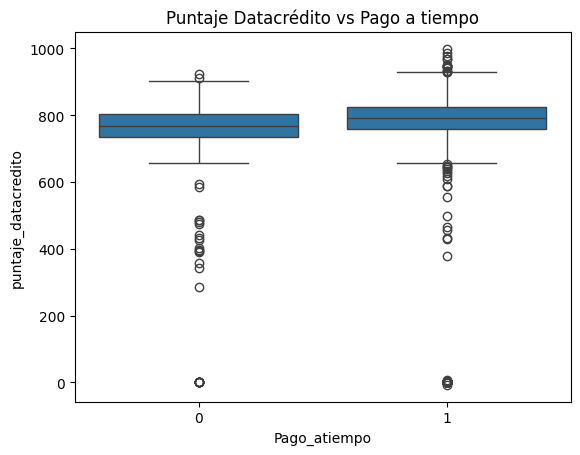

In [32]:
plt.figure()
sns.boxplot(x="Pago_atiempo", y="puntaje_datacredito", data=df)
plt.title("Puntaje Datacrédito vs Pago a tiempo")
plt.show()


### Relación entre el tipo laboral (Categorica) y el pago a tiempo

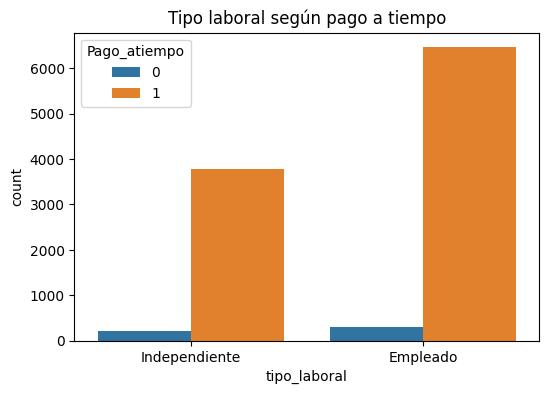

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="tipo_laboral", hue="Pago_atiempo", data=df)
plt.title("Tipo laboral según pago a tiempo")
plt.show()

### Matriz de correlación entre variables numéricas

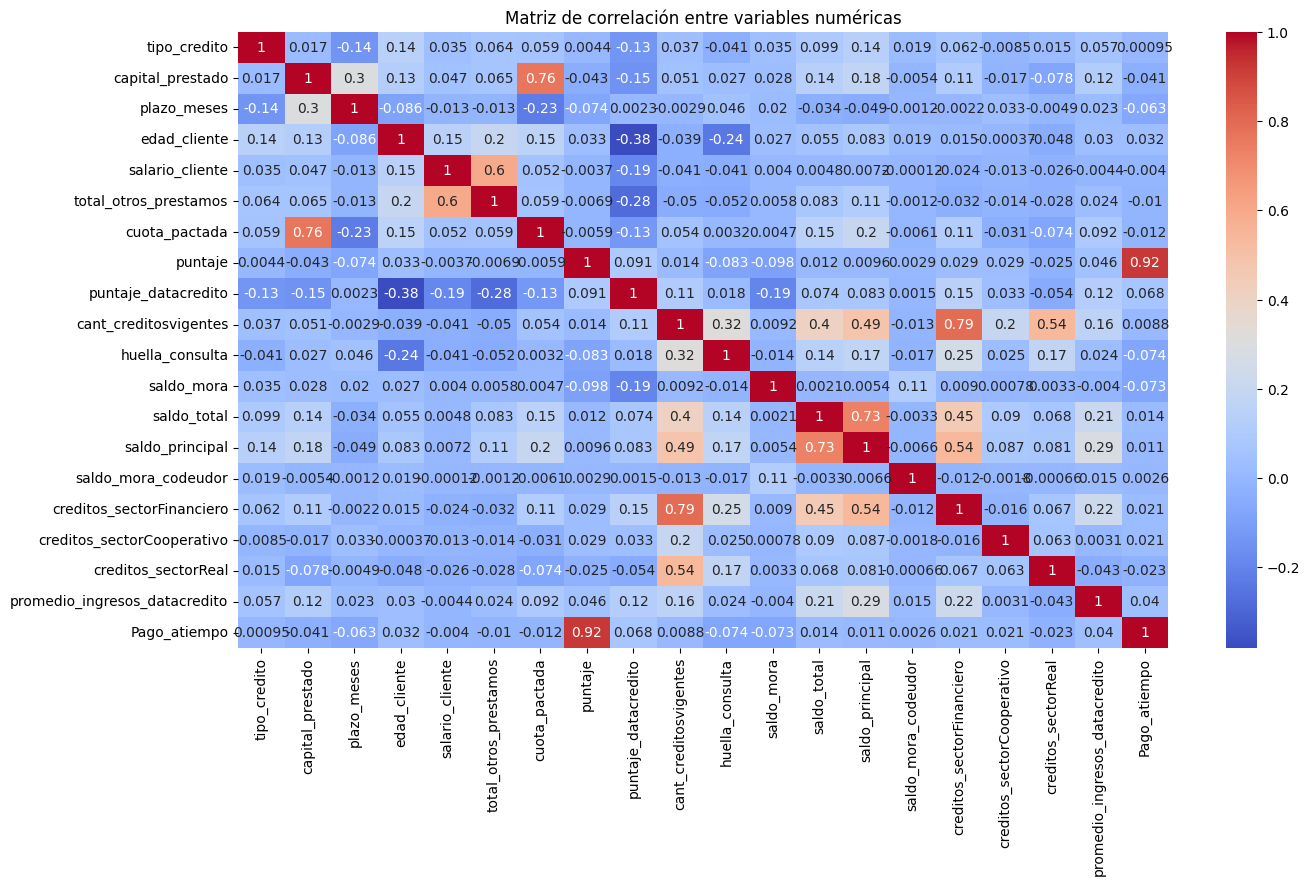

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(
    df.select_dtypes(include=["int64", "float64"]).corr(),
    cmap="coolwarm",
    annot=True
)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


El analisis exploratorio permitio comprender la estructura del conjunto de datos, identificar el tipo de variables, la distribucion de la variable target y la presencia de valores atipicos y datos faltantes.

Se evidencio un fuerte desbalance en la variable target, asi como diferencias en la distribucion de algunas variables numericas y categoricas frente al estado de pago.